# Load Libraries & Data

In [70]:
## Stats libraries
from sklearn import datasets
from scipy import stats
import statsmodels.api as smf
import researchpy as rp

## Data frame and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = datasets.load_iris()

In [3]:
data = iris['data']
target = iris['target']

df = pd.DataFrame(data)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df['target'] = target

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
def species_label(species):
    if species == 0:
        return 'setosa'
    if species == 1:
        return 'versicolor'
    if species == 2:
        return 'virginica'

In [6]:
df['species'] = df['target'].apply(species_label)

In [57]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


# EDA

In [58]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [63]:
df.iloc[:,0:3].describe()

,sepal_length,sepal_width,petal_length
count,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000
std,0.828066,0.435866,1.765298
min,4.300000,2.000000,1.000000
25%,5.100000,2.800000,1.600000
50%,5.800000,3.000000,4.350000
75%,6.400000,3.300000,5.100000
max,7.900000,4.400000,6.900000


In [69]:
df.groupby('species')['sepal_length'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,50.0,5.006,0.352490,4.3,4.800,5.0,5.2,5.8
versicolor,50.0,5.936,0.516171,4.9,5.600,5.9,6.3,7.0
virginica,50.0,6.588,0.635880,4.9,6.225,6.5,6.9,7.9


<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

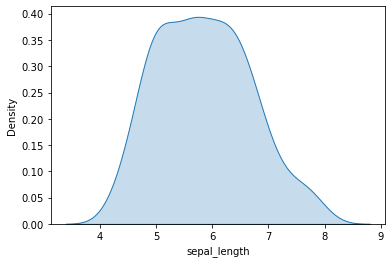

In [72]:
sns.kdeplot(df['sepal_length'], shade = True)

<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

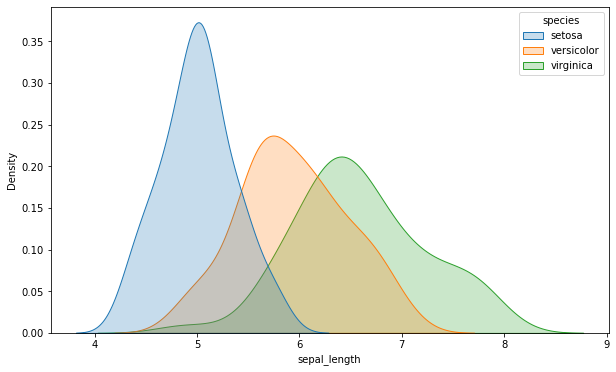

In [77]:
plt.figure(figsize = (10, 6))
sns.kdeplot(df['sepal_length'], shade = True, hue = df['species'])

## t-test

**Let's compare two of the species groups using a t-test.**

In [80]:
## get two groups to compare
two_groups =  ["setosa", 'versicolor']

## create a data frame of the two groups
df2 = df[df['species'].isin(two_groups)]
df2.head()

,sepal_length,sepal_width,petal_length,petal_width,target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [81]:
## t-test in statsmodels.api
smf.stats.ttest_ind(x1 = df2[df['species'] == 'setosa']['sepal_length'],
                    x2 = df2[df['species'] == 'versicolor']['sepal_length'],
                   alternative="two-sided")

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


(-10.5209862675491, 8.985235037487594e-18, 98.0)

In [82]:
## t-test in scipy
stats.ttest_ind(a = df2[df['species'] == 'setosa']['sepal_length'],
                b = df2[df['species'] == 'versicolor']['sepal_length'],
                alternative="two-sided")

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Ttest_indResult(statistic=-10.52098626754911, pvalue=8.985235037487079e-18)

### Both of these outputs are not really helpful -- they leave a lot to be desired. They don't tell us anything more than the test statistic, p-value, and degrees of freedom. 

### We can't really see the information we'd like about the two groups. Instead, we can use the `researchpy` library.

In [83]:
## t-test in reserachpy
rp.ttest(group1 = df2[df['species'] == 'setosa']['sepal_length'],
         group2 = df2[df['species'] == 'versicolor']['sepal_length'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


(       Variable      N   Mean        SD        SE  95% Conf.  Interval
 0  sepal_length   50.0  5.006  0.352490  0.049850   4.905824  5.106176
 1  sepal_length   50.0  5.936  0.516171  0.072998   5.789306  6.082694
 2      combined  100.0  5.471  0.641698  0.064170   5.343673  5.598327,
                             Independent t-test  results
 0  Difference (sepal_length - sepal_length) =   -0.9300
 1                        Degrees of freedom =   98.0000
 2                                         t =  -10.5210
 3                     Two side test p value =    0.0000
 4                    Difference < 0 p value =    0.0000
 5                    Difference > 0 p value =    1.0000
 6                                 Cohen's d =   -2.1042
 7                                 Hedge's g =   -2.0881
 8                             Glass's delta =   -2.6384
 9                               Pearson's r =    0.7283)

**This output is more informative. We can see the summary stats for both groups at the top. the t-test results follow below. We see the observed difference, versicolor has a sepal length 0.93 (5.006 - 5.936) longer that setosa, on average. We also get the degrees of freedom, t-statistic, and p-value, along with several measures of effect size.**

**Now let's see what happens when we build a linear regression model with the same, two-group, data.**


# Linear Regression

In [84]:
## Linear model to compare results with t-test (convert the species types of dummy variables)
X = df2[['species']]
X = pd.get_dummies(X['species'], drop_first = True)

y = df2[['sepal_length']]

In [85]:
## add an intercept constant, since it isn't done automatically
X = smf.add_constant(X)

# Build regression model
fit_lm = smf.OLS(y, X).fit()

# Get model output

fit_lm.summary()

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sepal_length   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     110.7
Date:                Sun, 15 May 2022   Prob (F-statistic):           8.99e-18
Time:                        16:24:27   Log-Likelihood:                -59.233
No. Observations:                 100   AIC:                             122.5
Df Residuals:                      98   BIC:                             127.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0060      0.063     80.090      0.000       4.882       5.130
versicolor     0.9300      0.088     10.521      0.000       0.755       1.105
==============================================================================
Omnibus:                        0.289   Durbin-Watson:                   1.762
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.425
Skew:                           0.111   Prob(JB):                        0.809
Kurtosis:                       2.770   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Notes:

* Notice that the slope coefficient for `versicolor` is 0.93, indicating it's `sepal_length` is, on average, 0.93 greater than the `setosa` `sepal_length`. This is the same result we obtained with our t-test above.


* The intercept coefficient is 5.006, which means that when `versicolor` is set to `0` in the model, `0 * 0.93 = 0`, all we are left with is the intercept, which is the mean value for `setosa` `sepal_length`, the same as we saw in our t-test.

In [133]:
## Add the predictions back to the data set
df2['preds'] = fit_lm.predict(X)
df2.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,sepal_length,sepal_width,petal_length,petal_width,target,species,preds,group_avg
0,5.1,3.5,1.4,0.2,0,setosa,5.006,5.006
1,4.9,3.0,1.4,0.2,0,setosa,5.006,5.006
2,4.7,3.2,1.3,0.2,0,setosa,5.006,5.006
3,4.6,3.1,1.5,0.2,0,setosa,5.006,5.006
4,5.0,3.6,1.4,0.2,0,setosa,5.006,5.006


In [134]:
## Calculate the residual
resid = df2['sepal_length'] - df2['preds']
resid.head()

0    0.094
1   -0.106
2   -0.306
3   -0.406
4   -0.006
dtype: float64

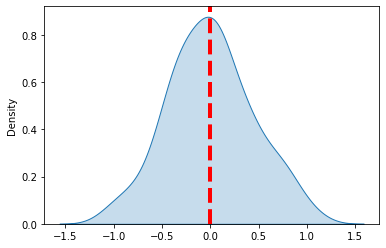

In [135]:
## plot the residuals
sns.kdeplot(resid,shade = True)
plt.axvline(x = 0,linewidth=4, linestyle = '--', color='r')

In [143]:
## Mean Squared Error
sqd_error = resid**2
mse = round(sqd_error.mean(), 4)
mse

0.1914

* Above we added the predictions into the model and then calculated and plotted the residual and then calculated the mean squared error. The question that was asked was, *But where are the residuals for the t-test?*. Since the t-test is just linear regression with a categorical feature that has two levels all that is being predicted from that type of model is the group averages in `sepal_length`. Therefore, we can simply use the group average for the respective `species`, calculate the residual and obtain the same result.

In [137]:
## Create a column that represents the group average

df2['group_avg'] = df2.groupby('species').sepal_length.transform('mean')
df2.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,sepal_length,sepal_width,petal_length,petal_width,target,species,preds,group_avg
0,5.1,3.5,1.4,0.2,0,setosa,5.006,5.006
1,4.9,3.0,1.4,0.2,0,setosa,5.006,5.006
2,4.7,3.2,1.3,0.2,0,setosa,5.006,5.006
3,4.6,3.1,1.5,0.2,0,setosa,5.006,5.006
4,5.0,3.6,1.4,0.2,0,setosa,5.006,5.006


In [138]:
## Calculate the residuals

resid2 = df2['sepal_length'] - df2['group_avg']
resid2.head()

0    0.094
1   -0.106
2   -0.306
3   -0.406
4   -0.006
dtype: float64

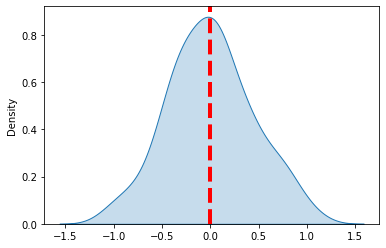

In [139]:
## plot the residuals
sns.kdeplot(resid2, shade = True)
plt.axvline(x = 0,linewidth=4, linestyle = '--', color='r')

In [142]:
## Mean Squared Error
sqd_error2 = resid2**2
mse2 = round(sqd_error2.mean(), 4)
mse2

0.1914

In [145]:
## Same Result

mse == mse2

True